In [12]:
import numpy as np
import pandas as pd

# reshape images to 14x14 -> 196 pixels

In [13]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [14]:
def reshape_to_14x14(df):
    _train = 'label' in df.columns
    
    _asd = np.zeros([df.shape[0], 196 + (1 if _train else 0)])
    if _train:
        _asd[:,0] = df.label.values
    
    for index, row in df.iterrows():
        if _train:
            _pixels = row.copy().drop('label').values.reshape(28,28)
            _asd[index, 1:] = _pixels[::2,::2].reshape(-1,).copy()
        else:
            _pixels = row.copy().values.reshape(28,28)

    df_red = pd.DataFrame(_asd.copy(), dtype=np.int, index = df.index)
    if _train:
        df_red = df_red.rename(columns = {0:'label'})
    return df_red

In [ ]:
df_train_red = reshape_to_14x14(df_train)
df_train_red.to_csv('../data/train_14x14.csv')

In [18]:
df_test_red = reshape_to_14x14(df_test)
df_test_red.to_csv('../data/test_14x14.csv')

In [21]:
from matplotlib import pyplot as plt

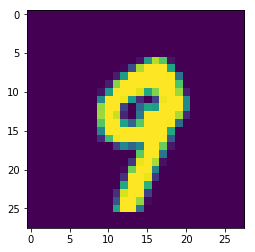

In [22]:
first_image = df_train.iloc[28,1:].values.reshape(28,28)
plt.imshow(first_image)
plt.show()

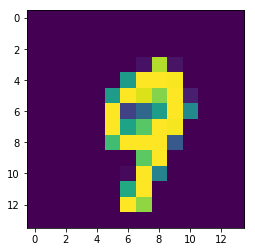

In [23]:
first_image = df_train_red.iloc[28,1:].values.reshape(14,14)
plt.imshow(first_image)
plt.show()

## It seems that a lot of pixels are always empty (corners)

In [ ]:
(df_train_red.sum()==0).sum()

In [ ]:
23/196.0

# 12% of the features can be dropped since they only contain 0's